## 시계열 데이터
 - 범주, 연속 이외 다른 변수 유형(타입)이 있는데 날짜나 시간 유형 데이터임
 - 시간변수는 시계열(Time series)라고 하며 데이터 분석에서 중요한 역할을 함
 - 주가, 환율 등은 시간이 흐름에 따라 불확실성을 가지고, 그 값이 변하므로 시계열의 좋은 예시가 됨
 - 시계열 분석이란 이렇듯 시간 변수의 흐름에 따른 종속변수의 움직임을 이해하고 예측하는 것을 목표로 분석하는 방법
 
 - split으로 날짜 데이터를 나누는 경우 리스트 형태로 반환
 
### 타임스템프
 - 특정 시점을 의미하는 자료형
 - to_datetime() 함수로 생성 가능하며 날짜 유형의 자료형을 시계열 타입으로 변환

### 기간 함수
 - 일정 기간을 의미
 - Timestamp(datetime)를 기간에 따른 자료형으로 이용하고자 할 때 사용
 - pd.date_range(): 년월일 날짜 형태의 기간으로 나누기
 - pd.period_range(): 년 or 월 or 일 형태의 기간으로 나누기

## 시계열 데이터 탐색

### 1. 시간조작하기

In [2]:
import pandas as pd

In [4]:
# 시간 유형 데이터 만들기
dates = ['2020-01-01','2020-03-01','2021-09-01']
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [5]:
# 날짜 타입으로 변환하기(형변환)
ts_dates = pd.to_datetime(dates)

In [6]:
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [7]:
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

In [8]:
type(ts_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
# 날짜형태를 기간형태로 추출하기
pr_day = ts_dates.to_period(freq = "D") # 매월 1일을 의미

In [12]:
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

In [13]:
# 년월 단위로 추출하기
pr_month = ts_dates.to_period(freq = "M")

In [14]:
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [15]:
# 년 단위로 추출하기
pr_year = ts_dates.to_period(freq = "Y")

In [16]:
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [5]:
# 타임스탬프
# timeseries.csv 파일을 읽어 들이시고 조회해 주세요...
import pandas as pd
file_path = "./data/timeseries.csv"
df = pd.read_csv(file_path)

In [6]:
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [8]:
# new_Date 컬럼을 새로 만들고...
# Date 컬럼의 유형을 날짜 타입으로 변환해서
# new_Date 컬럼 생성시 넣어 주세요

df["new_Date"] =  pd.to_datetime(df["Date"])

In [9]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [10]:
# new_Date 컬럼의 0번째 값을 조회해 주세요.
# 0번째 값의 일반타입도 조회해 주세요
type(df["new_Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
df["new_Date"].iloc[0]

Timestamp('2015-07-02 00:00:00')

In [33]:
# Date 컬럼 지우기
df.drop("Date", axis = 1, inplace = True)

In [34]:
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


In [11]:
# 시계열 데이터로 만들기 위해서는
# 가급적 index를 날짜 타입의 값으로 변경해 주는게 좋습니다.

df.set_index("new_Date", inplace = True) # new_Date컬럼의 데이터를 인덱스로 만들겠다.

In [12]:
df

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977
2016-06-29,2016-06-29,10700,10550,10900,9990,170253
2017-06-28,2017-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2019-06-26,2019-06-26,10800,10900,11000,10700,63039


In [41]:
# 시간 유형 데이터 만들기
dates = ['2020-01-01','2020-03-01','2021-09-01']
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [43]:
ts_dates = pd.to_datetime(dates)

In [44]:
# period 함수 사용하여 날짜 추출하기

In [52]:
# 년도 추출하기
pr_year = ts_dates.to_period(freq = "Y") # "Y"대신 "A"를 써도됨
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [53]:
# 월 추출하기
pr_month = ts_dates.to_period(freq = "M")
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [54]:
# 일 추출하기
pr_day = ts_dates.to_period(freq = "D")
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

### 2. 기간 설정하기

In [74]:
# start: 기간의 시작 값
# end: 기간의 끝 값
# periods: 생성할 기간의 갯수
# freq: 시간 간격 설정
# tz: 시간 국가 지정
timestamp_df = pd.date_range(start = "2020-01-01", # 2020년 1월1일을 시작으로
                            end = None, # 종료 년도는 없음으로 설정
                            periods = 6, # 6개의 구간으로 나누기
                            freq = "MS", # 시간 간격은 월 단위로 설정
                            tz = "Asia/Seoul") # 아시아/서울 시간을 기준으로

In [75]:
timestamp_df

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [76]:
# period_range로 기간 설정하기

In [78]:
py_y = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "2Y") # 2년 단위로 구간을 나눠줌
py_y

PeriodIndex(['2020', '2022', '2024'], dtype='period[2A-DEC]')

In [80]:
py_m = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "M")
py_m

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]')

In [82]:
py_d = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "2D") # 2일단위로
py_d

PeriodIndex(['2020-01-01', '2020-01-03', '2020-01-05'], dtype='period[2D]')

In [95]:
# 시간 단위로 나눔
py_h = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "H") #0시 -> 1시 -> 2시
py_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]')

In [94]:
# 분 단위로 나눔
py_min = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "MIN") # 분단위로 나눔
py_min

PeriodIndex(['2020-01-01 00:00', '2020-01-01 00:01', '2020-01-01 00:02'], dtype='period[T]')

In [93]:
# 초 단위로 나눔
py_s = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "S") # 초단위로 나눔
py_s

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
             '2020-01-01 00:00:02'],
            dtype='period[S]')

In [98]:
# 2일 단위, 2시간 단위, 2분 단위, 2초 단위로
# 3개의 구간을 생성해 주세요...
# 시작값은 위와 같습니다

py_hms = pd.period_range(start = '2020-01-01',
                      end = None,
                      periods = 3,
                      freq = "2D 2H 2MIN 2S") # 띄어쓰기는 안해도 무방
py_hms

PeriodIndex(['2020-01-01 00:00:00', '2020-01-03 02:02:02',
             '2020-01-05 04:04:04'],
            dtype='period[180122S]')

In [16]:
# 컬럼 단위로 년/월/일 분리하기
# new_Date 컬럼을 
import pandas as pd
file_path = "./data/timeseries.csv"
df = pd.read_csv(file_path)


df["new_Date"] = pd.to_datetime(df["Date"])

In [17]:
df["Year"] = df["new_Date"].dt.year

In [18]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019


In [19]:
df["month"] = df["new_Date"].dt.month

In [20]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,month
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6


In [21]:
df["Day"] = df["new_Date"].dt.day

In [23]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [24]:
# to_period()함수 사용하여 년도 추출하기

df["Date_yr"] = df["new_Date"].dt.to_period(freq = "Y")

In [26]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,month,Day,Date_yr
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019


In [28]:
df["Date_m"] = df["new_Date"].dt.to_period(freq = "M")
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,month,Day,Date_yr,Date_m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06


In [30]:
# new_Date 컬럼을 인덱스로 변환하기...
df.set_index("new_Date", inplace = True)

In [31]:
df

,Date,Close,Start,High,Low,Volume,Year,month,Day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06


In [32]:
# 날짜 인덱스값을 이용해서 데이터 조회하기...
# 인덱스값이 년 7월 2일에 대한 데이터를 조회해 주세요.
df.loc["2015-07-02"]

Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
month               7
Day                 2
Date_yr          2015
Date_m        2015-07
Name: 2015-07-02 00:00:00, dtype: object

In [33]:
df.iloc[0]

Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
month               7
Day                 2
Date_yr          2015
Date_m        2015-07
Name: 2015-07-02 00:00:00, dtype: object

In [34]:
df["2015-07"]

C:\Users\admin\AppData\Local\Temp/ipykernel_13564/2496551415.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2015-07"]


,Date,Close,Start,High,Low,Volume,Year,month,Day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07


In [116]:
# 조회할 수 있는 인덱스 기간 설정
df.loc["2018-06-25":"2019-06-28"]

,Date,Close,Start,High,Low,Volume,Year,month,Day
new_Date,,,,,,,,,
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26


In [120]:
#matplotlib 패키지 한글 폰트 설정시작
# 윈도우
# plt.rc('font,family = 'Malgun Gothic')
# plt.rc('font,family = 'AppleGothic')

<AxesSubplot:xlabel='new_Date'>

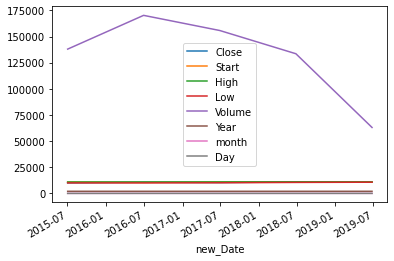

In [121]:
df.plot()

#### 선그래프
 - 선그래프(line plot)는 연속하는 데이터값들을 직선이나 곡선으로 연결하여 데이터값 사이 관계를 나타냄
 - 선그래프를 그리는 plot 함수에 입력할 x,y축 데이터를 선택함
 - 선그래프는 x축에 시간변수를 지정, 시간 변화량을 나타내는 시계열 데이터를 표현하는 그래프로도 많이 사용

#### 막대그래프
 - 막대그래프(Bar plot)는 집단 별 차이를 표현할때 사용
 - 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현하며 막대 높이의 상대적 길이 차이를 통해 값의 크기를 시각화 함
 - 막대 그래프 plt.bar([x축데이터],[y축데이터])를 지정합니다.
 
#### 산점도
 - 산점도(Scatter plot)는 서로 다른 '두 연속형 변수' 사이 관계를 나타내며 연속형 변수의 상관성을 확인 할 수 있음
 
#### 히스토그램
 - 히스토그램은 변수가 하나인 데이터 빈도수를 그래프로 표현
 - X축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 빈도를 y축에 표시
 - 구간을 나누는 간격의 크기에 따라 빈도와 히스토그램 모양이 변함

### 고급 시각화

#### 시본
 - 맷플롭립은 단순한 일을 쉽게, 복잡한 일도 가능하게 함
 - 시본은 복잡한 일도 쉽게 함
 - 시본은 맷플롭립을 기반으로 하는 파이썬 시각화 라이브러리이며, 좀더 동적인 시각화가 특징. 실제분석에서는 맷플롭립, 시본 두가지 모두를 함께 사용
  1. 시각적으로 뛰어남
  2. 간결한 구문을 제공함
  3. 판다스 데이터프레임에 최적화 되어있음
  4. 데이터프레임을 집계해서 쉽게 차트로 요약할 수 있음.

#### 막대그래프
 - 시본에서 사용하는 막대그래프는 sns.barplot()으로 파라미터 3개로 범주별 그룹까지 쉽게 표현할 수 있음
 - 시본은 막대그래프를 사용할 때 각 막대에 기본적으로 오차막대를 표시함
 - 오차막대를 그리는 범위를 부트스트랩 신뢰구간이라고 하며 이 데이터를 기반으로 유사한 상황의 95%가 해당 범위 내에서 결과를 얻을 것이라는 의미
 - 이 신뢰 구간은 평균 외에도 중앙값 최빈값 등의 다른 값들을 함께 고려해서 계산하는 것이기 때문에 자료분석에 도움이 되는 자료
  1. 변수: sns.barplot(X,Y data)
  2. 단일변수 : sns.catplot('......)
 
#### 박스플롯
 - 박스플롯의 정확한 명칭은 상자 수염 그림입니다.
 - 존 터키가 데이터 분포를 표현하기 위한 시각적 방법으로 만든 탐색적 그래프